<a href="https://www.kaggle.com/code/sherifsamyabdelkarem/heart-disease-ann?scriptVersionId=210900115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'/kaggle/input/heart-disease/heart_disease_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [9]:
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [10]:
df['target'].value_counts()
# wine2["country"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

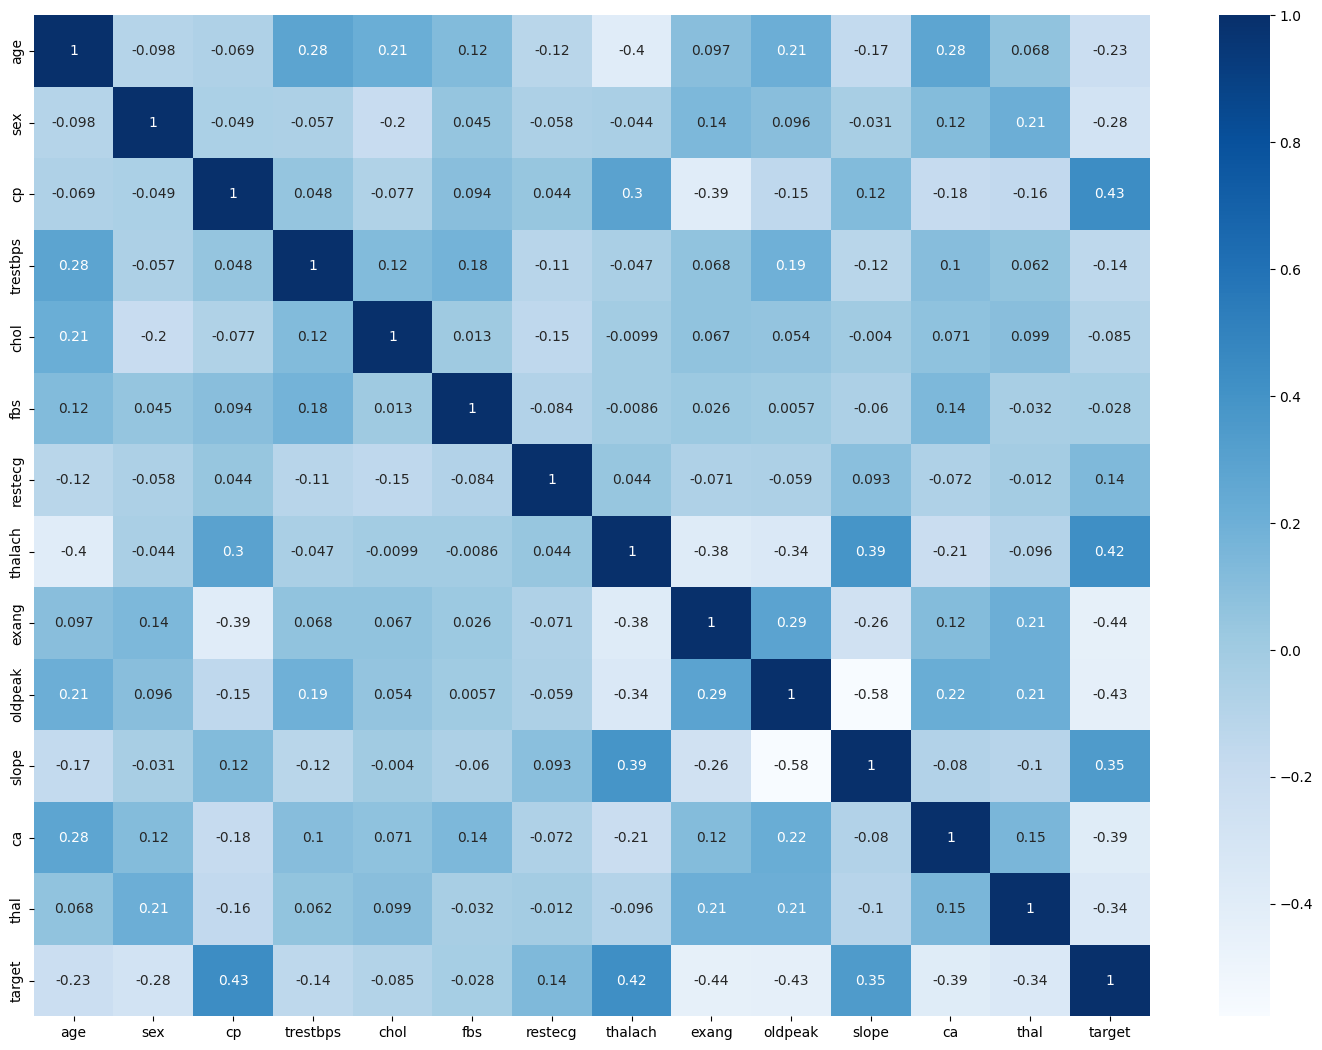

In [12]:
plt.figure(figsize = (18,13))
sns.heatmap(df.corr(),annot= True , cmap = 'Blues')

<Axes: >

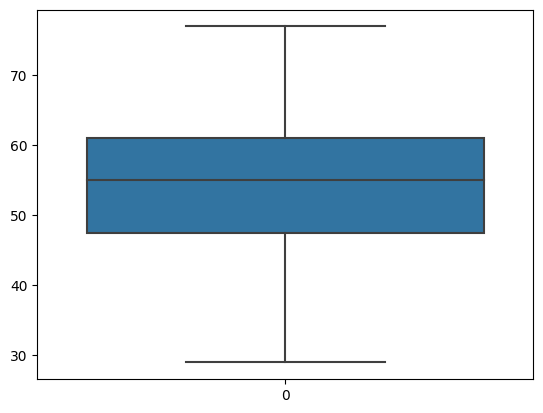

In [13]:
sns.boxplot(df['age'])

In [14]:
# sns.pairplot(df)
# sns.pairplot(df)

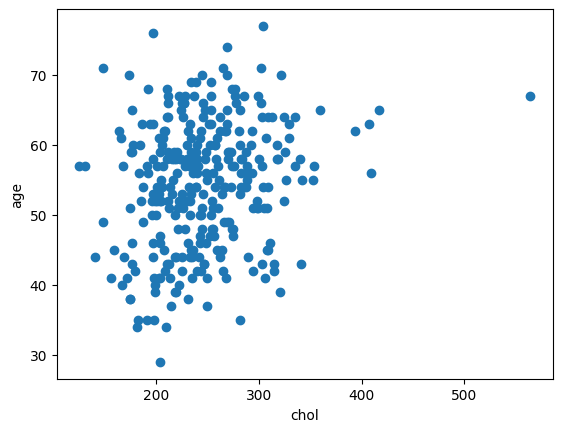

In [15]:
# plt.scatter(x = df['age'] , y = ['chol'])
plt.scatter(df['chol'],df['age'])
plt.xlabel('chol')
plt.ylabel('age')
plt.show()


<Axes: xlabel='chol', ylabel='age'>

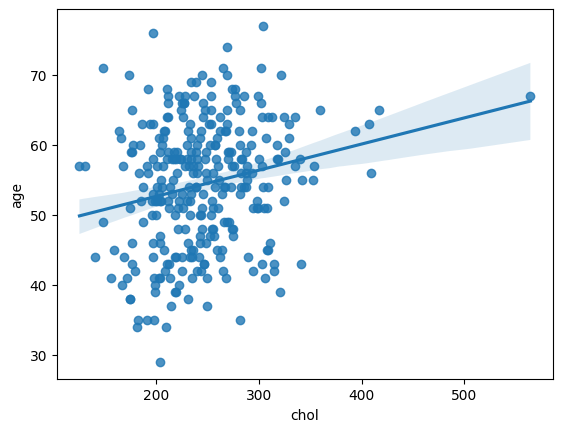

In [16]:
sns.regplot(x = df['chol'] , y = df['age'])

<Axes: xlabel='age', ylabel='chol'>

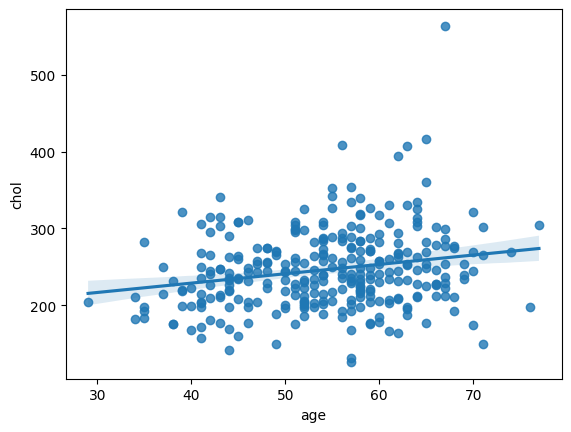

In [17]:
sns.regplot(x = df['age'] , y = df['chol'])

/tmp/ipykernel_26/1384229396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'])


<Axes: xlabel='chol', ylabel='Density'>

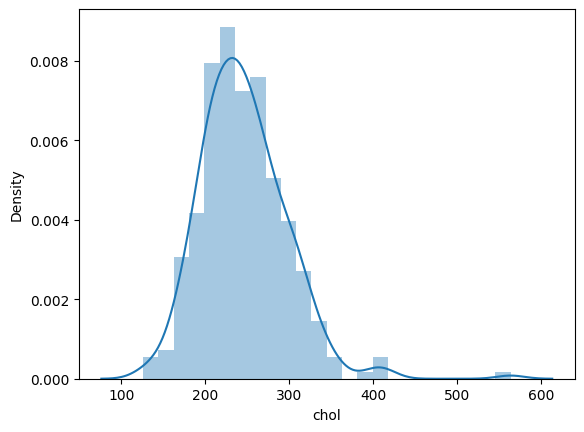

In [18]:
sns.distplot(df['chol'])

/tmp/ipykernel_26/3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

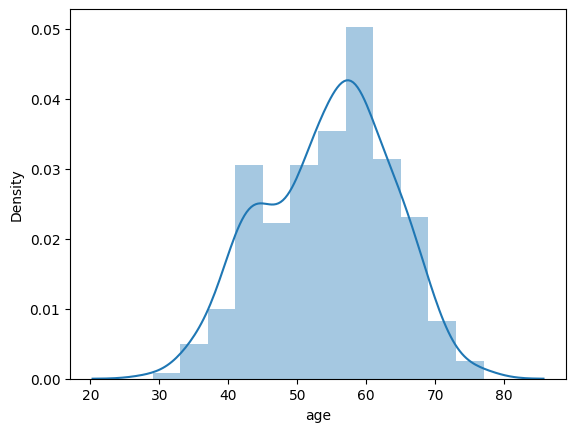

In [19]:
sns.distplot(df['age'])

In [20]:
df.rename(columns={'sex' : 'gender'},inplace=True)
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


/tmp/ipykernel_26/1253694846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gender'])


<Axes: xlabel='gender', ylabel='Density'>

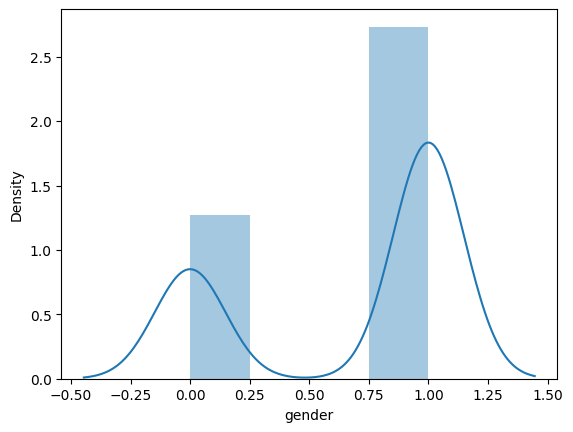

In [21]:
sns.distplot(df['gender'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Classify model

In [23]:
x = df.drop(columns=['target'])
y = df['target']

x_train , x_test , y_train ,y_test = train_test_split(x,y ,test_size=0.3)


In [24]:
LRM = LogisticRegression(penalty='l1',max_iter=100,solver='liblinear')
LRM

LogisticRegression(penalty='l1', solver='liblinear')

In [25]:
LRM.fit(x_train,y_train)
LRM.score(x_train,y_train)

0.8584905660377359

In [26]:
LRM.score(x_test,y_test)

0.8461538461538461

In [27]:
y_pred = LRM.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

<Axes: >

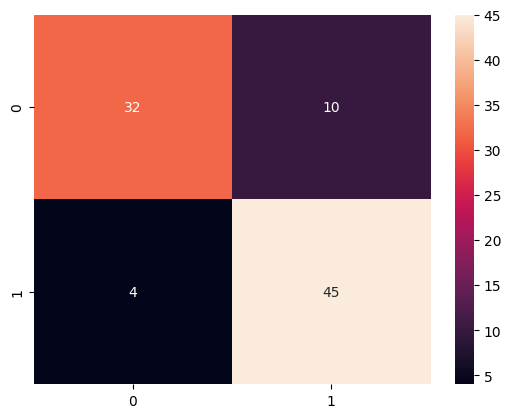

In [28]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True)

In [29]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lr=LogisticRegression(penalty='l1',max_iter=100,solver='liblinear')
    # pipe = make_pipeline(column_trans, lr)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score.append(r2_score(y_test, y_pred))

In [30]:
np.argmax(score)

526

In [31]:
score[np.argmax(score)]

0.801948051948052

# ANN Model

In [32]:
# data split
x = df.drop(columns='target')
y = df['target']

# feature scaling
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# data scaling
from sklearn.preprocessing import StandardScaler
SD = StandardScaler()
x_train = SD.fit_transform(x_train)
x_test = SD.fit_transform(x_test)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, activation, Dropout

model = Sequential()

# L1 [ input layer ]
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
# model.add(Dropout(rate = 0.1))
# L2
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dropout(rate = 0.1))

model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dropout(rate = 0.1))
# L3
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dropout(rate = 0.1))

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dropout(rate = 0.1))
# output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,665
Trainable params: 9,665
Non-trainabl

In [35]:
# Compiling
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=64, epochs=150)

Epoch 1/150
4/4 [==============================] - 4s 70ms/step - loss: 0.6931 - accuracy: 0.5161 - val_loss: 0.6930 - val_accuracy: 0.5455
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6929 - accuracy: 0.5576 - val_loss: 0.6929 - val_accuracy: 0.5455
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.5576 - val_loss: 0.6927 - val_accuracy: 0.5455
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6926 - accuracy: 0.5576 - val_loss: 0.6926 - val_accuracy: 0.5455
Epoch 5/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6924 - accuracy: 0.5576 - val_loss: 0.6924 - val_accuracy: 0.5455
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6921 - accuracy: 0.5576 - val_loss: 0.6922 - val_accuracy: 0.5455
Epoch 7/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6920 - accuracy: 0.5576 - val_loss: 0.6920 - val_accuracy: 0.5455
Epoch 8/150
4/4 [===

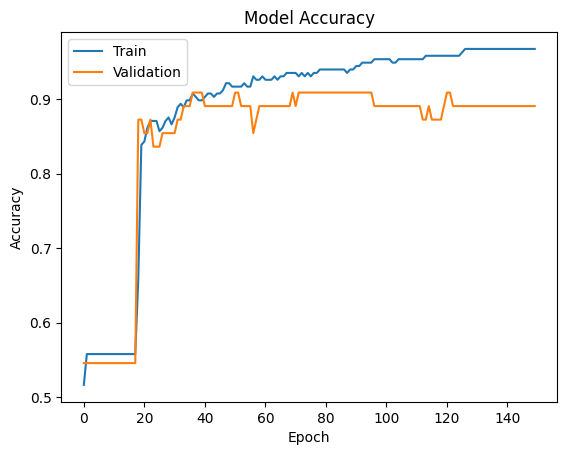

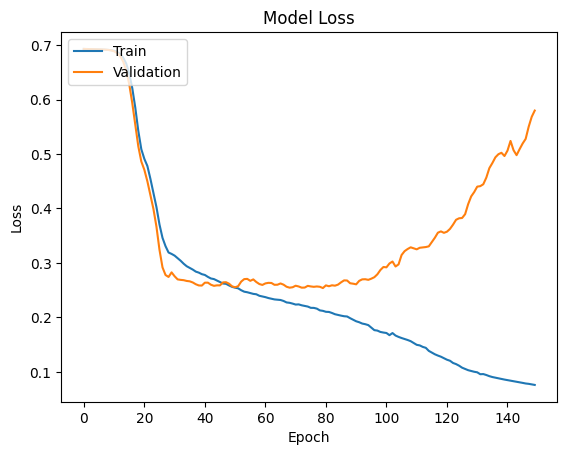

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) # Access history from the 'history' object
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss']) # Access history from the 'history' object
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

1/1 [==============================] - 0s 88ms/step


In [39]:
from sklearn.metrics import accuracy_score

AS = accuracy_score(y_test,y_pred)
AS

0.7741935483870968

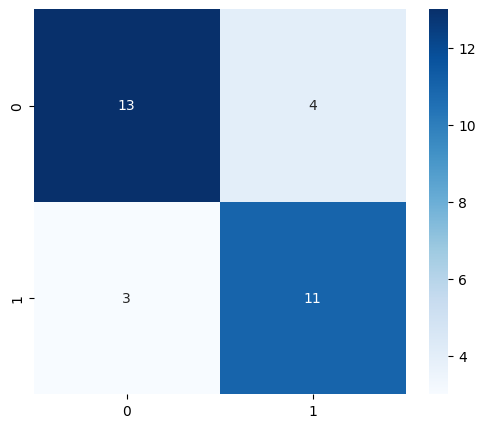

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
plt.show()